In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import os

In [ ]:
def reserve(time):
    stat = ''
    if time < 1 : stat = '18시 ~ 24시'
    elif 7 > time >= 1 : stat = '01시 ~ 07시'
    elif 12 > time >= 7 : stat = '07시 ~ 12시'
    elif 18 > time >= 12 : stat = '12시 ~ 18시'
    elif 24 > time >= 18 : stat = '18시 ~ 24시'
    return stat

In [128]:
def price(time):
        stat = ''
        if time < 90000 : stat = '90,000원 이하'
        elif 90000 <= time < 110000  : stat = '90,000 ~ 110,000원'
        elif 110000 <= time < 120000 : stat = '110,000 ~ 120,000원'
        elif 120000 <= time < 130000 : stat = '120,000 ~ 130,000원'
        elif 130000 <= time < 140000 : stat = '130,000 ~ 140,000원'
        elif 140000 <= time < 160000 : stat = '140,000 ~ 160,000원'
        elif 160000 <= time < 180000: stat =  '160,000 ~ 180,000원'
        elif 180000 <= time < 200000 : stat = '180,000 ~ 200,000원'
        elif 200000 <= time          : stat = '200,000원 이상'

        return stat


In [132]:
def time(time):
        stat = ''
        if time < 90000 : stat ='~ 09시'
        elif 90000 <= time < 120000  : stat = '09시 ~ 12시'
        elif 120000 <= time < 180000 : stat = '12시 ~ 18시'
        elif 180000 <= time <= 240000 : stat = '18시 ~ 24시'


        return stat


In [183]:
def div(time):
    stat = ''
    if time < 1 : stat = '당일예약'
    elif 2 >= time >= 1 : stat = '1 ~ 2일전'
    elif 7 >= time > 2 : stat = '3 ~ 7일전'
    elif 15 >= time > 7 : stat = '8 ~ 15일'
    elif  time >= 16 : stat = '16일 ~'

    return stat

In [71]:
def timemiuns(x):
    return (datetime.date(int(str(x)[:4]) ,int(str(x)[4:-2].lstrip('0')) ,int(str(x)[-2:].lstrip('0'))))

In [2]:
os.chdir('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거')

In [140]:
df = pd.read_csv('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터_합친거(0314).csv')
df_cancel = pd.read_csv('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약취소데이터merge.csv')
df_call = pd.read_csv('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터전화.csv')

In [143]:
df_call

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,통화일자,통화시간,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값
0,엘리시안CC,서부권,회원제+대중제,36,20220301,20524,1,40.0,비도민,95,NaN,NaN,NaN
1,스프링데일CC,동부권,대중제,18,20220301,40341,2,40.0,도민,NaN,NaN,NaN,NaN
2,크라운CC,동부권,대중제,27,20220301,62252,0,NaN,도민,NaN,NaN,NaN,NaN
3,크라운CC,동부권,대중제,27,20220301,62414,0,NaN,도민,NaN,NaN,NaN,NaN
4,중문GC,중문/서귀포,대중제,18,20220301,62500,2,30.0,도민,20,1년미만,5회이상,골프초년생
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,제주CC,제주시권,대중제,18,20210615,103439,1,40.0,도민,40,NaN,NaN,NaN
19622,더클래식CC,동부권,대중제,18,20210615,104114,2,NaN,도민,NaN,1~3년,2회,골프초년생
19623,더클래식CC,동부권,대중제,18,20210615,104132,2,NaN,도민,NaN,1~3년,2회,골프초년생
19624,더클래식CC,동부권,대중제,18,20210615,104224,2,NaN,도민,NaN,1~3년,2회,골프초년생


In [27]:
df.columns = ['골프장명',
'골프장지역명',
'골프장멤버십값',
'골프장유형값',
'사용일자',
'사용시간값',
'사용유형명',
'거주자금액',
'비거주자금액',
'결제수단명',
'총인원수',
'거주자인원수',
'비거주자인원수',
'예약일자',
'예약시간',
'판매업체명',
'예약자성별코드',
'예약자연령대코드',
'예약자거주지값',
'예약자평균값',
'예약자골프경력값',
'예약자평균사용값',
'예약자사용성향값'
]

In [29]:
df_call.columns = ['골프장명',
'골프장지역명',
'골프장멤버십값',
'골프장유형값',
'통화일자',
'통화시간',
'예약자성별코드',
'예약자연령대코드',
'예약자거주지값',
'예약자평균값',
'예약자골프경력값',
'예약자평균사용값',
'예약자사용성향값']

In [30]:
# df.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터_합친거(0314).csv')
# df_cancel.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약취소데이터merge.csv')
# df_call.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터전화.csv')

In [32]:
df['예약년월일'] = df['예약일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')

days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

df['예약날짜요일변환'] = df['예약년월일'].apply(lambda x: days[datetime.date(x).weekday()])
df['예약날짜요일변환'].value_counts()

화요일    3987
목요일    3789
월요일    3769
수요일    3755
금요일    3578
토요일    2187
일요일    1791
Name: 예약날짜요일변환, dtype: int64

In [33]:
df['예약시간'] = df['예약시간'].apply(lambda x:  '0' +str(x) if len(str(x)) == 5 else
                         '00' + str(x) if len(str(x)) == 4 else
                         '000' + str(x) if len(str(x)) == 3 
                         else x)


df['예약시간(시)'] = df['예약시간'].apply(lambda x: str(x)[:2]).astype(int)

In [35]:

df['예약시간대별'] = df['예약시간(시)'].apply(lambda x: reserve(x))

df['예약시간대별'].value_counts()

12시 ~ 18시    10562
18시 ~ 24시     6068
07시 ~ 12시     5665
01시 ~ 07시      557
                 4
Name: 예약시간대별, dtype: int64

In [36]:
df['예약월/날짜별'] = df['예약일자'].apply(lambda x: str(x)[4:]).astype(str)
df['월별'] = df['예약일자'].apply(lambda x: str(x)[4:6])
df['날짜별'] = df['예약일자'].apply(lambda x: str(x)[6:])

In [41]:
df.사용일자.unique()

array([20220309, 20220315, 20220314, 20220308, 20220304, 20220310,
       20220324, 20220317, 20220321, 20220311, 20220302, 20220312,
       20220303, 20220307, 20220306, 20220325, 20220329, 20220330,
       20220316, 20220323, 20220331, 20220322, 20220313, 20220320,
       20220318, 20220305, 20220319, 20220328, 20220326, 20220327,
       20220406, 20220407, 20220401, 20220405, 20220404, 20220408,
       20220413, 20200425, 20200411, 20200416, 20200420, 20200517,
       20200429, 20200504, 20200522, 20200322, 20200505, 20200510,
       20200512, 20200516, 20200529, 20200508, 20200606, 20200607,
       20200519, 20200524, 20200617, 20200528, 20200613, 20200526,
       20200627, 20200530, 20200611, 20200404, 20200430, 20200503,
       20200502, 20200422, 20200515, 20200518, 20200426, 20200511,
       20200626, 20200601, 20200527, 20200605, 20200523, 20200531,
       20200602, 20200525, 20200414, 20200329, 20200403, 20200409,
       20200501, 20200412, 20200428, 20200427, 20200604, 20200

In [42]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자골프경력값,예약자평균사용값,예약자사용성향값,예약년월일,예약날짜요일변환,예약시간(시),예약시간대별,예약월/날짜별,월별,날짜별
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,10년이상,5회이상,주말골프,2022-03-01,화요일,8,07시 ~ 12시,0301,03,01
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,10년이상,5회이상,"주중골프,오후골프",2022-03-01,화요일,8,07시 ~ 12시,0301,03,01
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,NaN,NaN,NaN,2022-03-01,화요일,10,07시 ~ 12시,0301,03,01
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,10년이상,3회,"주중골프,오후골프",2022-03-01,화요일,8,07시 ~ 12시,0301,03,01
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,NaN,NaN,NaN,2022-03-01,화요일,10,07시 ~ 12시,0301,03,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,NaN,NaN,NaN,2021-10-24,일요일,14,12시 ~ 18시,1024,10,24
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,4~6년,2회,새벽골프,2021-10-24,일요일,14,12시 ~ 18시,1024,10,24
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,1년미만,4회,"골프초년생,주중골프,음주가무",2021-10-28,목요일,13,12시 ~ 18시,1028,10,28
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,NaN,NaN,NaN,2021-10-29,금요일,16,12시 ~ 18시,1029,10,29


In [61]:
df_cancel.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '취소일자', '취소시간', '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값',
       '예약자골프경력값', '예약자평균사용값', '예약자사용성향값'],
      dtype='object')

In [62]:
df_call.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '통화일자', '통화시간', '예약자성별코드',
       '예약자연령대코드', '예약자거주지값', '예약자평균값', '예약자골프경력값', '예약자평균사용값', '예약자사용성향값'],
      dtype='object')

In [65]:
df_call.통화일자

0        20220301
1        20220301
2        20220301
3        20220301
4        20220301
           ...   
19621    20210615
19622    20210615
19623    20210615
19624    20210615
19625    20210615
Name: 통화일자, Length: 19626, dtype: int64

In [63]:
df.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값', '예약자골프경력값',
       '예약자평균사용값', '예약자사용성향값', '예약년월일', '예약날짜요일변환', '예약시간(시)', '예약시간대별',
       '예약월/날짜별', '월별', '날짜별', '해당년도'],
      dtype='object')

### 해당년도로 나누기

In [153]:
df['해당년도'] = df['사용일자'].apply(lambda x: str(x)[:4]+'년' if (int(str(x)[:4]) in [2020]) else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2021] )else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2022] )else '미분류')
df_call['해당년도'] = df_call['통화일자'].apply(lambda x: str(x)[:4]+'년' if (int(str(x)[:4]) in [2020]) else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2021] )else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2022] )else '미분류')
df_cancel['해당년도'] = df_cancel['사용일자'].apply(lambda x: str(x)[:4]+'년' if (int(str(x)[:4]) in [2020]) else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2021] )else
                              str(x)[:4]+'년' if (int(str(x)[:4]) in [2022] )else '미분류')

In [154]:
df_cancel.사전예약취소=(df_cancel.취소일자.apply(lambda x : timemiuns(x)) - df_cancel.예약일자.apply(lambda x: timemiuns(x)))
df_cancel.사전예약취소 = df_cancel.사전예약취소.apply(lambda x : x.days)

/tmp/ipykernel_6814/4028847853.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_cancel.사전예약취소=(df_cancel.취소일자.apply(lambda x : timemiuns(x)) - df_cancel.예약일자.apply(lambda x: timemiuns(x)))


In [155]:
(datetime.date(int(str(df_cancel.취소일자[0])[:4]) ,int(str(df_cancel.취소일자[0])[4:-2].lstrip('0')) ,int(str(df_cancel.취소일자[0])[-2:].lstrip('0')))
 -
 datetime.date(int(str(df_cancel.예약일자[0])[:4]) ,int(str(df_cancel.예약일자[0])[4:-2].lstrip('0')) ,int(str(df_cancel.예약일자[0])[-2:].lstrip('0')))
 ).days

0

In [156]:
df_cancel2 = copy.deepcopy(df_cancel.사전예약취소)

In [157]:
df_cancel2 = pd.DataFrame(df_cancel2)

In [158]:
df_cancel2.rename(columns={0:'사전예약취소'},inplace=True)

In [159]:
df_cancel2

,사전예약취소
0,0
1,0
2,0
3,0
4,0
...,...
7227,0
7228,1
7229,1
7230,0


In [160]:
df_merge=pd.concat([df_cancel,df_cancel2],axis=1)

In [163]:
df_cancel = copy.deepcopy(df_merge)

In [164]:
df_cancel.예약일자[0]

20220301

In [165]:
df_cancel.취소일자[0]

20220301

In [166]:
df_cancel.사전예약취소[0]

0

In [167]:
df_cancel.사전예약취소 = df_cancel.사전예약취소.apply(lambda x : '당일취소' if (x in [0]) else
                                          '1~2일전' if (x in [1,2]) else
                                          '3~7일전' if (x in [3,4,5,6,7]) else
                                          '8~15일전' if (x in [8,9,10,11,12,13,14,15]) else '16일~' )

In [168]:
df_cancel.예약일자

0       20220301
1       20220301
2       20220301
3       20220301
4       20220301
          ...   
7227    20211028
7228    20211021
7229    20211021
7230    20211019
7231    20211024
Name: 예약일자, Length: 7232, dtype: int64

In [169]:
# 거주자 금액
df['거주자금액(원)'] = df['거주자금액'].apply(lambda x: price(x))

# 비거주자 금액
df['비거주자금액(원)'] = df['비거주자금액'].apply(lambda x: price(x))

df_cancel['거주자금액(원)'] = df_cancel['거주자금액'].apply(lambda x: price(x))

# 비거주자 금액
df_cancel['비거주자금액(원)'] = df_cancel['비거주자금액'].apply(lambda x: price(x))

In [170]:
df

,Unnamed: 0,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,...,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,거주자금액(원),비거주자금액(원)
0,0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,...,1,50.0,도민,12,10년이상,5회이상,주말골프,2022년,"140,000 ~ 160,000원","200,000원 이상"
1,1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,...,1,NaN,도민,20,10년이상,5회이상,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
2,2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,...,1,NaN,도민,20,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
3,3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,...,1,60.0,도민,14,10년이상,3회,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
4,4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,...,2,40.0,도민,25,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,...,1,NaN,도민,NaN,NaN,NaN,NaN,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원"
22852,22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,...,2,50.0,도민,24,4~6년,2회,새벽골프,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
22853,22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,...,0,NaN,도민,NaN,1년미만,4회,"골프초년생,주중골프,음주가무",2021년,"200,000원 이상","200,000원 이상"
22854,22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,...,1,50.0,도민,18,NaN,NaN,NaN,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원"


In [171]:
df_call

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,통화일자,통화시간,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,call시간대
0,엘리시안CC,서부권,회원제+대중제,36,20220301,20524,1,40.0,비도민,95,NaN,NaN,NaN,2022년,~ 09시
1,스프링데일CC,동부권,대중제,18,20220301,40341,2,40.0,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
2,크라운CC,동부권,대중제,27,20220301,62252,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
3,크라운CC,동부권,대중제,27,20220301,62414,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
4,중문GC,중문/서귀포,대중제,18,20220301,62500,2,30.0,도민,20,1년미만,5회이상,골프초년생,2022년,~ 09시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,제주CC,제주시권,대중제,18,20210615,103439,1,40.0,도민,40,NaN,NaN,NaN,2021년,09시 ~ 12시
19622,더클래식CC,동부권,대중제,18,20210615,104114,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19623,더클래식CC,동부권,대중제,18,20210615,104132,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19624,더클래식CC,동부권,대중제,18,20210615,104224,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시


In [172]:
df_call['call시간대'] = df_call['통화시간'].apply(lambda x: time(x))

In [173]:
df_call

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,통화일자,통화시간,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,call시간대
0,엘리시안CC,서부권,회원제+대중제,36,20220301,20524,1,40.0,비도민,95,NaN,NaN,NaN,2022년,~ 09시
1,스프링데일CC,동부권,대중제,18,20220301,40341,2,40.0,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
2,크라운CC,동부권,대중제,27,20220301,62252,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
3,크라운CC,동부권,대중제,27,20220301,62414,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
4,중문GC,중문/서귀포,대중제,18,20220301,62500,2,30.0,도민,20,1년미만,5회이상,골프초년생,2022년,~ 09시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,제주CC,제주시권,대중제,18,20210615,103439,1,40.0,도민,40,NaN,NaN,NaN,2021년,09시 ~ 12시
19622,더클래식CC,동부권,대중제,18,20210615,104114,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19623,더클래식CC,동부권,대중제,18,20210615,104132,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19624,더클래식CC,동부권,대중제,18,20210615,104224,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시


In [174]:
df_cancel

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,사전예약취소,거주자금액(원),비거주자금액(원)
0,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,NaN,도민,20,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원"
1,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,40.0,도민,25,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원"
2,아덴힐GC,서부권,대중제,18,20220308,1128,왕이메,130000,190000,현장결제,...,40.0,도민,20,4~6년,4회,골프초년생,2022년,당일취소,"130,000 ~ 140,000원","180,000 ~ 200,000원"
3,라온GC,서부권,대중제,27,20220325,830,STONE,182500,202500,현장결제,...,40.0,비도민,16,10년이상,4회,주말골프,2022년,당일취소,"180,000 ~ 200,000원","200,000원 이상"
4,라온GC,서부권,대중제,27,20220324,1153,LAKE,162500,182500,현장결제,...,40.0,비도민,16,10년이상,4회,주말골프,2022년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,라온GC,서부권,대중제,27,20211103,1214,LAKE,162500,182500,현장결제,...,NaN,도민,NaN,1~3년,4회,골프초년생,2021년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원"
7228,해비치CC,동부권,회원제+대중제,36,20211031,1241,VALLEY,170000,230000,현장결제,...,30.0,도민,7,NaN,NaN,NaN,2021년,1~2일전,"160,000 ~ 180,000원","200,000원 이상"
7229,제주CC,제주시권,대중제,18,20211101,724,랜덤,135000,135000,선결제,...,30.0,도민,NaN,1~3년,1회이하,"골프초년생,주중골프",2021년,1~2일전,"130,000 ~ 140,000원","130,000 ~ 140,000원"
7230,라온GC,서부권,대중제,27,20211024,1303,STONE,192500,222500,현장결제,...,30.0,도민,18,NaN,NaN,NaN,2021년,당일취소,"180,000 ~ 200,000원","200,000원 이상"


In [175]:
df

,Unnamed: 0,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,...,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,거주자금액(원),비거주자금액(원)
0,0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,...,1,50.0,도민,12,10년이상,5회이상,주말골프,2022년,"140,000 ~ 160,000원","200,000원 이상"
1,1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,...,1,NaN,도민,20,10년이상,5회이상,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
2,2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,...,1,NaN,도민,20,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
3,3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,...,1,60.0,도민,14,10년이상,3회,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
4,4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,...,2,40.0,도민,25,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,...,1,NaN,도민,NaN,NaN,NaN,NaN,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원"
22852,22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,...,2,50.0,도민,24,4~6년,2회,새벽골프,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
22853,22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,...,0,NaN,도민,NaN,1년미만,4회,"골프초년생,주중골프,음주가무",2021년,"200,000원 이상","200,000원 이상"
22854,22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,...,1,50.0,도민,18,NaN,NaN,NaN,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원"


In [176]:
df

,Unnamed: 0,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,...,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,거주자금액(원),비거주자금액(원)
0,0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,...,1,50.0,도민,12,10년이상,5회이상,주말골프,2022년,"140,000 ~ 160,000원","200,000원 이상"
1,1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,...,1,NaN,도민,20,10년이상,5회이상,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
2,2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,...,1,NaN,도민,20,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
3,3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,...,1,60.0,도민,14,10년이상,3회,"주중골프,오후골프",2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원"
4,4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,...,2,40.0,도민,25,NaN,NaN,NaN,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,...,1,NaN,도민,NaN,NaN,NaN,NaN,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원"
22852,22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,...,2,50.0,도민,24,4~6년,2회,새벽골프,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원"
22853,22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,...,0,NaN,도민,NaN,1년미만,4회,"골프초년생,주중골프,음주가무",2021년,"200,000원 이상","200,000원 이상"
22854,22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,...,1,50.0,도민,18,NaN,NaN,NaN,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원"


In [ ]:
df.예약년월일

In [179]:
# df['예약년월일'] = df['예약일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')
# df['사용년월일'] = df['사용일자'].apply(lambda x:date(int(str(x)[:4]),int(str(x)[4:6]),int(str(x)[6:])).isoformat()).astype('datetime64[ns]')
# df['날짜차이'] = df['사용년월일'] - df['예약년월일']
# df['날짜차이'] = df['날짜차이'].apply(lambda x: str(x)[:2]).astype(int)

In [184]:
df['날짜차이요일'] = df['날짜차이'].apply(lambda x: div(x))
df['날짜차이요일'].value_counts()

3 ~ 7일전    7061
8 ~ 15일    7059
16일 ~      5422
1 ~ 2일전    3302
당일예약         12
Name: 날짜차이요일, dtype: int64

In [190]:
df_cancel['예약시간'] = df_cancel['예약시간'].apply(lambda x:  '0' +str(x) if len(str(x)) == 5 else
                         '00' + str(x) if len(str(x)) == 4 else
                         '000' + str(x) if len(str(x)) == 3 
                         else x)


df_cancel['예약시간(시)'] = df_cancel['예약시간'].apply(lambda x: str(x)[:2]).astype(int)

df['예약시간'] = df['예약시간'].apply(lambda x:  '0' +str(x) if len(str(x)) == 5 else
                         '00' + str(x) if len(str(x)) == 4 else
                         '000' + str(x) if len(str(x)) == 3 
                         else x)


df['예약시간(시)'] = df['예약시간'].apply(lambda x: str(x)[:2]).astype(int)

In [191]:
df['예약시간대별'] = df['예약시간(시)'].apply(lambda x: reserve(x))

df['예약시간대별'].value_counts()

df_cancel['예약시간대별'] = df_cancel['예약시간(시)'].apply(lambda x: reserve(x))

df_cancel['예약시간대별'].value_counts()

12시 ~ 18시    3286
18시 ~ 24시    1938
07시 ~ 12시    1767
01시 ~ 07시     240
                1
Name: 예약시간대별, dtype: int64

In [192]:
df_cancel

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,사전예약취소,거주자금액(원),비거주자금액(원),예약시간(시),예약시간대별
0,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,20,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원",10,07시 ~ 12시
1,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,25,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원",10,07시 ~ 12시
2,아덴힐GC,서부권,대중제,18,20220308,1128,왕이메,130000,190000,현장결제,...,20,4~6년,4회,골프초년생,2022년,당일취소,"130,000 ~ 140,000원","180,000 ~ 200,000원",11,07시 ~ 12시
3,라온GC,서부권,대중제,27,20220325,830,STONE,182500,202500,현장결제,...,16,10년이상,4회,주말골프,2022년,당일취소,"180,000 ~ 200,000원","200,000원 이상",15,12시 ~ 18시
4,라온GC,서부권,대중제,27,20220324,1153,LAKE,162500,182500,현장결제,...,16,10년이상,4회,주말골프,2022년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원",16,12시 ~ 18시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,라온GC,서부권,대중제,27,20211103,1214,LAKE,162500,182500,현장결제,...,NaN,1~3년,4회,골프초년생,2021년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원",10,07시 ~ 12시
7228,해비치CC,동부권,회원제+대중제,36,20211031,1241,VALLEY,170000,230000,현장결제,...,7,NaN,NaN,NaN,2021년,1~2일전,"160,000 ~ 180,000원","200,000원 이상",12,12시 ~ 18시
7229,제주CC,제주시권,대중제,18,20211101,724,랜덤,135000,135000,선결제,...,NaN,1~3년,1회이하,"골프초년생,주중골프",2021년,1~2일전,"130,000 ~ 140,000원","130,000 ~ 140,000원",16,12시 ~ 18시
7230,라온GC,서부권,대중제,27,20211024,1303,STONE,192500,222500,현장결제,...,18,NaN,NaN,NaN,2021년,당일취소,"180,000 ~ 200,000원","200,000원 이상",8,07시 ~ 12시


In [196]:
def start(time):
    stat = ''
    if time < 600 : stat ='12시 ~'
    elif 600 <= time < 800  : stat = '06시 ~ 08시'
    elif 800 <= time < 1000 : stat = '08시 ~ 10시'
    elif 1000 <= time < 1200 : stat = '10시 ~ 12시'
    elif 1200 <= time : stat = '12시 ~'


    return stat

df['사용일통계'] = df['사용시간값'].apply(lambda x: start(x))
df['사용일통계'].value_counts()

12시 ~        8418
06시 ~ 08시    8226
08시 ~ 10시    4567
10시 ~ 12시    1645
Name: 사용일통계, dtype: int64

In [199]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,해당년도,거주자금액(원),비거주자금액(원),예약년월일,사용년월일,날짜차이,날짜차이요일,예약시간(시),예약시간대별,사용일통계
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,2022년,"140,000 ~ 160,000원","200,000원 이상",2022-03-01,2022-03-09,8,8 ~ 15일,8,07시 ~ 12시,08시 ~ 10시
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원",2021-10-24,2021-10-30,6,3 ~ 7일전,14,12시 ~ 18시,12시 ~
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2021-10-24,2021-11-02,9,8 ~ 15일,14,12시 ~ 18시,06시 ~ 08시
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,2021년,"200,000원 이상","200,000원 이상",2021-10-28,2021-10-30,2,1 ~ 2일전,13,12시 ~ 18시,12시 ~
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2021-10-29,2021-11-01,3,3 ~ 7일전,16,12시 ~ 18시,06시 ~ 08시


In [200]:
df_call

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,통화일자,통화시간,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,call시간대
0,엘리시안CC,서부권,회원제+대중제,36,20220301,20524,1,40.0,비도민,95,NaN,NaN,NaN,2022년,~ 09시
1,스프링데일CC,동부권,대중제,18,20220301,40341,2,40.0,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
2,크라운CC,동부권,대중제,27,20220301,62252,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
3,크라운CC,동부권,대중제,27,20220301,62414,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
4,중문GC,중문/서귀포,대중제,18,20220301,62500,2,30.0,도민,20,1년미만,5회이상,골프초년생,2022년,~ 09시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,제주CC,제주시권,대중제,18,20210615,103439,1,40.0,도민,40,NaN,NaN,NaN,2021년,09시 ~ 12시
19622,더클래식CC,동부권,대중제,18,20210615,104114,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19623,더클래식CC,동부권,대중제,18,20210615,104132,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19624,더클래식CC,동부권,대중제,18,20210615,104224,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시


In [201]:
df_cancel

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,사전예약취소,거주자금액(원),비거주자금액(원),예약시간(시),예약시간대별
0,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,20,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원",10,07시 ~ 12시
1,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,25,NaN,NaN,NaN,2022년,당일취소,"130,000 ~ 140,000원","130,000 ~ 140,000원",10,07시 ~ 12시
2,아덴힐GC,서부권,대중제,18,20220308,1128,왕이메,130000,190000,현장결제,...,20,4~6년,4회,골프초년생,2022년,당일취소,"130,000 ~ 140,000원","180,000 ~ 200,000원",11,07시 ~ 12시
3,라온GC,서부권,대중제,27,20220325,830,STONE,182500,202500,현장결제,...,16,10년이상,4회,주말골프,2022년,당일취소,"180,000 ~ 200,000원","200,000원 이상",15,12시 ~ 18시
4,라온GC,서부권,대중제,27,20220324,1153,LAKE,162500,182500,현장결제,...,16,10년이상,4회,주말골프,2022년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원",16,12시 ~ 18시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,라온GC,서부권,대중제,27,20211103,1214,LAKE,162500,182500,현장결제,...,NaN,1~3년,4회,골프초년생,2021년,당일취소,"160,000 ~ 180,000원","180,000 ~ 200,000원",10,07시 ~ 12시
7228,해비치CC,동부권,회원제+대중제,36,20211031,1241,VALLEY,170000,230000,현장결제,...,7,NaN,NaN,NaN,2021년,1~2일전,"160,000 ~ 180,000원","200,000원 이상",12,12시 ~ 18시
7229,제주CC,제주시권,대중제,18,20211101,724,랜덤,135000,135000,선결제,...,NaN,1~3년,1회이하,"골프초년생,주중골프",2021년,1~2일전,"130,000 ~ 140,000원","130,000 ~ 140,000원",16,12시 ~ 18시
7230,라온GC,서부권,대중제,27,20211024,1303,STONE,192500,222500,현장결제,...,18,NaN,NaN,NaN,2021년,당일취소,"180,000 ~ 200,000원","200,000원 이상",8,07시 ~ 12시


In [236]:
# df.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터_합친거(0314).csv',index=False)
# df_cancel.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약취소데이터merge.csv',index=False)
# df_call.to_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터전화.csv',index=False)

In [210]:
df.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값', '예약자골프경력값',
       '예약자평균사용값', '예약자사용성향값', '해당년도', '거주자금액(원)', '비거주자금액(원)', '예약년월일',
       '사용년월일', '날짜차이', '날짜차이요일', '예약시간(시)', '예약시간대별', '사용일통계'],
      dtype='object')

In [213]:
df.groupby(['해당년도','예약시간대별']).예약시간대별.count()

해당년도   예약시간대별   
2020년                  2
       01시 ~ 07시     169
       07시 ~ 12시    1673
       12시 ~ 18시    3185
       18시 ~ 24시    1803
2021년                  2
       01시 ~ 07시     373
       07시 ~ 12시    3815
       12시 ~ 18시    6968
       18시 ~ 24시    4066
2022년  01시 ~ 07시      15
       07시 ~ 12시     177
       12시 ~ 18시     409
       18시 ~ 24시     199
Name: 예약시간대별, dtype: int64

In [245]:
df_cancel.groupby(['해당년도','예약시간대별']).예약시간대별.count()

해당년도   예약시간대별   
2020년  01시 ~ 07시      69
       07시 ~ 12시     461
       12시 ~ 18시     896
       18시 ~ 24시     542
2021년                  1
       01시 ~ 07시     161
       07시 ~ 12시    1245
       12시 ~ 18시    2277
       18시 ~ 24시    1327
2022년  01시 ~ 07시      10
       07시 ~ 12시      61
       12시 ~ 18시     113
       18시 ~ 24시      69
Name: 예약시간대별, dtype: int64

In [214]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,해당년도,거주자금액(원),비거주자금액(원),예약년월일,사용년월일,날짜차이,날짜차이요일,예약시간(시),예약시간대별,사용일통계
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,2022년,"140,000 ~ 160,000원","200,000원 이상",2022-03-01,2022-03-09,8,8 ~ 15일,8,07시 ~ 12시,08시 ~ 10시
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원",2021-10-24,2021-10-30,6,3 ~ 7일전,14,12시 ~ 18시,12시 ~
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2021-10-24,2021-11-02,9,8 ~ 15일,14,12시 ~ 18시,06시 ~ 08시
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,2021년,"200,000원 이상","200,000원 이상",2021-10-28,2021-10-30,2,1 ~ 2일전,13,12시 ~ 18시,12시 ~
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2021-10-29,2021-11-01,3,3 ~ 7일전,16,12시 ~ 18시,06시 ~ 08시


In [217]:
df['날짜차이요일'] = df['날짜차이'].apply(lambda x: div(x))
df['날짜차이요일'].value_counts()

3 ~ 7일전    7061
8 ~ 15일    7059
16일 ~      5422
1 ~ 2일전    3302
당일예약         12
Name: 날짜차이요일, dtype: int64

In [ ]:
df_cancel.groupby(['해당년도','예약시간대별']).예약시간대별.count()

In [218]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,해당년도,거주자금액(원),비거주자금액(원),예약년월일,사용년월일,날짜차이,날짜차이요일,예약시간(시),예약시간대별,사용일통계
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,2022년,"140,000 ~ 160,000원","200,000원 이상",2022-03-01,2022-03-09,8,8 ~ 15일,8,07시 ~ 12시,08시 ~ 10시
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원",2021-10-24,2021-10-30,6,3 ~ 7일전,14,12시 ~ 18시,12시 ~
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2021-10-24,2021-11-02,9,8 ~ 15일,14,12시 ~ 18시,06시 ~ 08시
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,2021년,"200,000원 이상","200,000원 이상",2021-10-28,2021-10-30,2,1 ~ 2일전,13,12시 ~ 18시,12시 ~
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2021-10-29,2021-11-01,3,3 ~ 7일전,16,12시 ~ 18시,06시 ~ 08시


In [ ]:
df.groupby(['해당년도','예약시간대별']).예약시간대별.count()

In [220]:
df.groupby(['해당년도','날짜차이요일']).날짜차이요일.count()

해당년도   날짜차이요일 
2020년  1 ~ 2일전    1179
       16일 ~      1865
       3 ~ 7일전    2156
       8 ~ 15일    1625
       당일예약          7
2021년  1 ~ 2일전    1962
       16일 ~      3400
       3 ~ 7일전    4673
       8 ~ 15일    5184
       당일예약          5
2022년  1 ~ 2일전     161
       16일 ~       157
       3 ~ 7일전     232
       8 ~ 15일     250
Name: 날짜차이요일, dtype: int64

In [222]:
df_cancel.groupby(['해당년도','사전예약취소']).사전예약취소.count()

해당년도   사전예약취소
2020년  16일~       209
       1~2일전      482
       3~7일전      363
       8~15일전     175
       당일취소       739
2021년  16일~       366
       1~2일전     1372
       3~7일전     1074
       8~15일전     551
       당일취소      1648
2022년  16일~         3
       1~2일전       80
       3~7일전       66
       8~15일전      15
       당일취소        89
Name: 사전예약취소, dtype: int64

In [223]:
df.groupby(['해당년도','사용일통계']).사용일통계.count()

해당년도   사용일통계    
2020년  06시 ~ 08시    2533
       08시 ~ 10시    1287
       10시 ~ 12시     551
       12시 ~        2461
2021년  06시 ~ 08시    5497
       08시 ~ 10시    3080
       10시 ~ 12시     989
       12시 ~        5658
2022년  06시 ~ 08시     196
       08시 ~ 10시     200
       10시 ~ 12시     105
       12시 ~         299
Name: 사용일통계, dtype: int64

In [224]:
df.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값', '예약자골프경력값',
       '예약자평균사용값', '예약자사용성향값', '해당년도', '거주자금액(원)', '비거주자금액(원)', '예약년월일',
       '사용년월일', '날짜차이', '날짜차이요일', '예약시간(시)', '예약시간대별', '사용일통계'],
      dtype='object')

In [232]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,해당년도,거주자금액,비거주자금액,예약년월일,사용년월일,날짜차이,날짜차이요일,예약시간(시),예약시간대별,사용일통계
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,2022년,"140,000 ~ 160,000원","200,000원 이상",2022-03-01,2022-03-09,8,8 ~ 15일,8,07시 ~ 12시,08시 ~ 10시
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원",2021-10-24,2021-10-30,6,3 ~ 7일전,14,12시 ~ 18시,12시 ~
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2021-10-24,2021-11-02,9,8 ~ 15일,14,12시 ~ 18시,06시 ~ 08시
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,2021년,"200,000원 이상","200,000원 이상",2021-10-28,2021-10-30,2,1 ~ 2일전,13,12시 ~ 18시,12시 ~
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2021-10-29,2021-11-01,3,3 ~ 7일전,16,12시 ~ 18시,06시 ~ 08시


In [ ]:
pd.read_csv

In [ ]:
df.groupby(['해당년도','거주자금액']).거주자금액.count()

In [233]:
# df=pd.read_csv ('/media/minwooking/9C33-6BBD/WorkSpace/Next_Ez_jejudo/data/골프장데이터년도별/합친거/예약데이터_합친거(0314).csv')


In [234]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,해당년도,거주자금액(원),비거주자금액(원),예약년월일,사용년월일,날짜차이,날짜차이요일,예약시간(시),예약시간대별,사용일통계
0,아덴힐GC,서부권,대중제,18,20220309,852,새별,155000,220000,현장결제,...,2022년,"140,000 ~ 160,000원","200,000원 이상",2022-03-01,2022-03-09,8,8 ~ 15일,8,07시 ~ 12시,08시 ~ 10시
1,라온GC,서부권,대중제,27,20220315,1235,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
2,그린필드CC,제주시내권,회원제,18,20220314,756,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
3,라온GC,서부권,대중제,27,20220315,1228,LAKE,152500,182500,현장결제,...,2022년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2022-03-01,2022-03-15,14,8 ~ 15일,8,07시 ~ 12시,12시 ~
4,그린필드CC,제주시내권,회원제,18,20220314,749,M,132000,132000,선결제,...,2022년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2022-03-01,2022-03-14,13,8 ~ 15일,10,07시 ~ 12시,06시 ~ 08시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,제주CC,제주시권,대중제,18,20211030,1233,랜덤,165000,165000,선결제,...,2021년,"160,000 ~ 180,000원","160,000 ~ 180,000원",2021-10-24,2021-10-30,6,3 ~ 7일전,14,12시 ~ 18시,12시 ~
22852,제주CC,제주시권,대중제,18,20211102,717,랜덤,135000,135000,선결제,...,2021년,"130,000 ~ 140,000원","130,000 ~ 140,000원",2021-10-24,2021-11-02,9,8 ~ 15일,14,12시 ~ 18시,06시 ~ 08시
22853,해비치CC,동부권,회원제+대중제,36,20211030,1248,PALM,200000,260000,현장결제,...,2021년,"200,000원 이상","200,000원 이상",2021-10-28,2021-10-30,2,1 ~ 2일전,13,12시 ~ 18시,12시 ~
22854,해비치CC,동부권,회원제+대중제,36,20211101,712,LAKE,150000,190000,현장결제,...,2021년,"140,000 ~ 160,000원","180,000 ~ 200,000원",2021-10-29,2021-11-01,3,3 ~ 7일전,16,12시 ~ 18시,06시 ~ 08시


In [248]:
# df_cancel.rename(columns={'거주자금액(원)':'거주자금액나눔'},inplace=True)
# df_cancel.rename(columns={'비거주자금액(원)':'비거주자나눔'},inplace=True)

In [241]:
df.groupby(['해당년도','거주자금액나눔']).거주자금액나눔.count()

해당년도   거주자금액나눔           
2020년  110,000 ~ 120,000원     395
       120,000 ~ 130,000원     335
       130,000 ~ 140,000원     444
       140,000 ~ 160,000원     394
       160,000 ~ 180,000원     152
       180,000 ~ 200,000원       9
       200,000원 이상             24
       90,000 ~ 110,000원     2634
       90,000원 이하            2445
2021년  110,000 ~ 120,000원    1682
       120,000 ~ 130,000원    1487
       130,000 ~ 140,000원    1677
       140,000 ~ 160,000원    2604
       160,000 ~ 180,000원    1405
       180,000 ~ 200,000원     383
       200,000원 이상            166
       90,000 ~ 110,000원     4141
       90,000원 이하            1679
2022년  110,000 ~ 120,000원      24
       120,000 ~ 130,000원      54
       130,000 ~ 140,000원     146
       140,000 ~ 160,000원     358
       160,000 ~ 180,000원     132
       180,000 ~ 200,000원      50
       200,000원 이상             20
       90,000 ~ 110,000원       16
Name: 거주자금액나눔, dtype: int64

In [239]:
df.groupby(['해당년도','비거주자나눔']).비거주자나눔.count()

해당년도   비거주자나눔            
2020년  110,000 ~ 120,000원      47
       120,000 ~ 130,000원     129
       130,000 ~ 140,000원     290
       140,000 ~ 160,000원     173
       160,000 ~ 180,000원     275
       180,000 ~ 200,000원      55
       200,000원 이상             44
       90,000 ~ 110,000원        3
       90,000원 이하            5816
2021년  110,000 ~ 120,000원     364
       120,000 ~ 130,000원     333
       130,000 ~ 140,000원     539
       140,000 ~ 160,000원    2525
       160,000 ~ 180,000원    1766
       180,000 ~ 200,000원    3947
       200,000원 이상           3937
       90,000 ~ 110,000원     1418
       90,000원 이하             395
2022년  110,000 ~ 120,000원      10
       120,000 ~ 130,000원       9
       130,000 ~ 140,000원      49
       140,000 ~ 160,000원      22
       160,000 ~ 180,000원      23
       180,000 ~ 200,000원     391
       200,000원 이상            280
       90,000 ~ 110,000원       16
Name: 비거주자나눔, dtype: int64

In [243]:
df_call.groupby(['해당년도','call시간대']).call시간대.count()

해당년도   call시간대  
2021년  09시 ~ 12시    7149
       12시 ~ 18시    9836
       18시 ~ 24시     639
       ~ 09시        1172
2022년  09시 ~ 12시     359
       12시 ~ 18시     405
       18시 ~ 24시      20
       ~ 09시          46
Name: call시간대, dtype: int64

In [249]:
df_cancel.groupby(['해당년도','거주자금액나눔']).거주자금액나눔.count()

해당년도   거주자금액나눔           
2020년  110,000 ~ 120,000원     104
       120,000 ~ 130,000원      78
       130,000 ~ 140,000원     145
       140,000 ~ 160,000원     145
       160,000 ~ 180,000원      70
       180,000 ~ 200,000원       6
       200,000원 이상             15
       90,000 ~ 110,000원      774
       90,000원 이하             631
2021년  110,000 ~ 120,000원     559
       120,000 ~ 130,000원     448
       130,000 ~ 140,000원     507
       140,000 ~ 160,000원     990
       160,000 ~ 180,000원     465
       180,000 ~ 200,000원     188
       200,000원 이상             70
       90,000 ~ 110,000원     1159
       90,000원 이하             625
2022년  110,000 ~ 120,000원       8
       120,000 ~ 130,000원       7
       130,000 ~ 140,000원      35
       140,000 ~ 160,000원     117
       160,000 ~ 180,000원      52
       180,000 ~ 200,000원      23
       200,000원 이상              9
       90,000 ~ 110,000원        2
Name: 거주자금액나눔, dtype: int64

In [250]:
df_cancel.groupby(['해당년도','거주자금액나눔']).거주자금액나눔.count()

해당년도   거주자금액나눔           
2020년  110,000 ~ 120,000원     104
       120,000 ~ 130,000원      78
       130,000 ~ 140,000원     145
       140,000 ~ 160,000원     145
       160,000 ~ 180,000원      70
       180,000 ~ 200,000원       6
       200,000원 이상             15
       90,000 ~ 110,000원      774
       90,000원 이하             631
2021년  110,000 ~ 120,000원     559
       120,000 ~ 130,000원     448
       130,000 ~ 140,000원     507
       140,000 ~ 160,000원     990
       160,000 ~ 180,000원     465
       180,000 ~ 200,000원     188
       200,000원 이상             70
       90,000 ~ 110,000원     1159
       90,000원 이하             625
2022년  110,000 ~ 120,000원       8
       120,000 ~ 130,000원       7
       130,000 ~ 140,000원      35
       140,000 ~ 160,000원     117
       160,000 ~ 180,000원      52
       180,000 ~ 200,000원      23
       200,000원 이상              9
       90,000 ~ 110,000원        2
Name: 거주자금액나눔, dtype: int64

In [23]:
df_cancel=pd.read_csv('F:\\WorkSpace\\Next_Ez_jejudo\data\\골프장데이터년도별\\합친거\\예약취소데이터merge.csv')
df=pd.read_csv('F:\\WorkSpace\\Next_Ez_jejudo\data\\골프장데이터년도별\\합친거\\예약데이터_합친거(0314).csv')
df_call=pd.read_csv('F:\\WorkSpace\\Next_Ez_jejudo\data\\골프장데이터년도별\\합친거\\예약데이터전화.csv')


In [10]:
df_cancel.rename(columns={'거주자금액(원)':'거주자금액나눔'},inplace=True)
df_cancel.rename(columns={'비거주자금액(원)':'비거주자나눔'},inplace=True)

In [11]:
# df_cancel.to_csv('F:\\WorkSpace\\Next_Ez_jejudo\data\\골프장데이터년도별\\합친거\\예약취소데이터merge.csv',index=False)


In [12]:
df_cancel.groupby(['해당년도','비거주자나눔']). 비거주자나눔.count()

해당년도   비거주자나눔            
2020년  110,000 ~ 120,000원      22
       120,000 ~ 130,000원      17
       130,000 ~ 140,000원     110
       140,000 ~ 160,000원      83
       160,000 ~ 180,000원     116
       180,000 ~ 200,000원      21
       200,000원 이상             24
       90,000 ~ 110,000원        3
       90,000원 이하            1572
2021년  110,000 ~ 120,000원     168
       120,000 ~ 130,000원     108
       130,000 ~ 140,000원     191
       140,000 ~ 160,000원     875
       160,000 ~ 180,000원     511
       180,000 ~ 200,000원    1314
       200,000원 이상           1172
       90,000 ~ 110,000원      500
       90,000원 이하             172
2022년  110,000 ~ 120,000원       6
       120,000 ~ 130,000원       3
       130,000 ~ 140,000원      13
       140,000 ~ 160,000원       8
       160,000 ~ 180,000원       8
       180,000 ~ 200,000원     136
       200,000원 이상             77
       90,000 ~ 110,000원        2
Name: 비거주자나눔, dtype: int64

In [13]:
df_cancel.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '취소일자', '취소시간', '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값',
       '예약자골프경력값', '예약자평균사용값', '예약자사용성향값', '해당년도', '사전예약취소', '거주자금액나눔',
       '비거주자나눔', '예약시간(시)', '예약시간대별'],
      dtype='object')

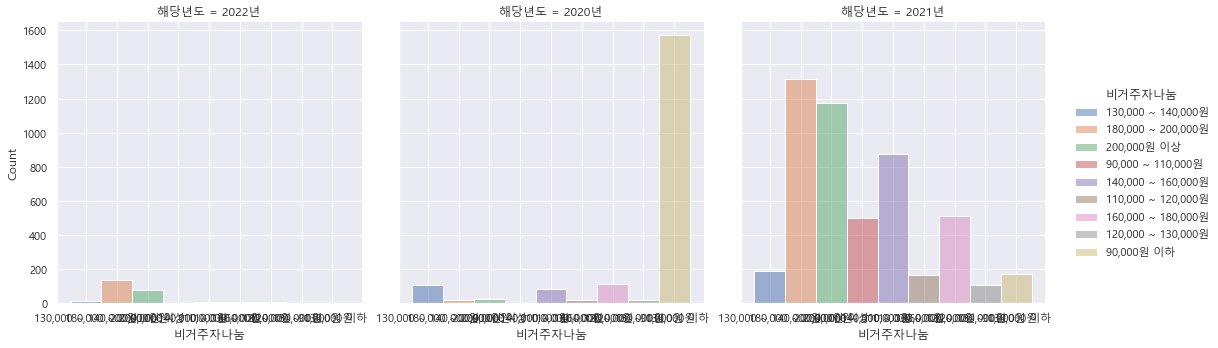

In [17]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_cancel, x="비거주자나눔",col='해당년도',hue='비거주자나눔',)

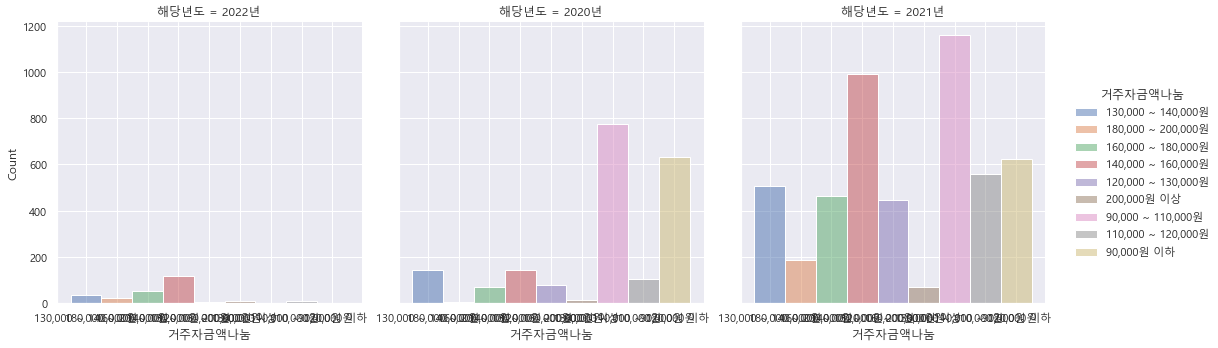

In [18]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_cancel, x="거주자금액나눔",col='해당년도',hue='거주자금액나눔',)

In [20]:
df_cancel.columns

Index(['골프장명', '골프장지역명', '골프장멤버십값', '골프장유형값', '사용일자', '사용시간값', '사용유형명',
       '거주자금액', '비거주자금액', '결제수단명', '총인원수', '거주자인원수', '비거주자인원수', '예약일자', '예약시간',
       '취소일자', '취소시간', '판매업체명', '예약자성별코드', '예약자연령대코드', '예약자거주지값', '예약자평균값',
       '예약자골프경력값', '예약자평균사용값', '예약자사용성향값', '해당년도', '사전예약취소', '거주자금액나눔',
       '비거주자나눔', '예약시간(시)', '예약시간대별'],
      dtype='object')

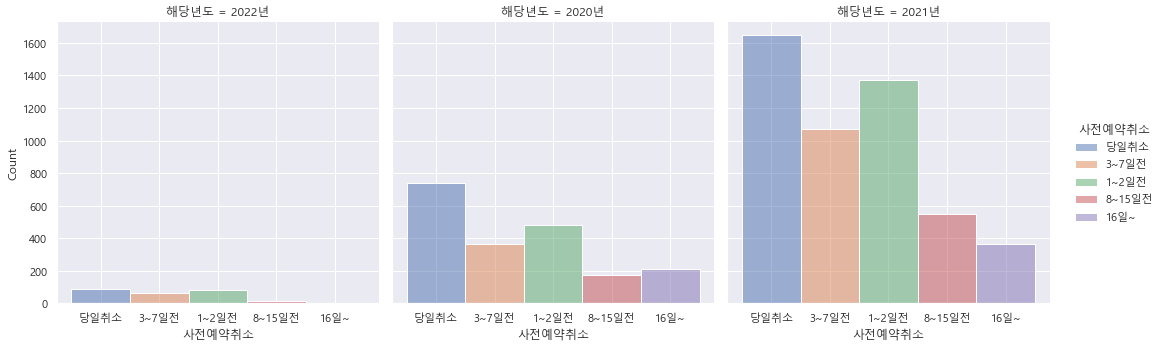

In [21]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_cancel, x="사전예약취소",col='해당년도',hue='사전예약취소',)

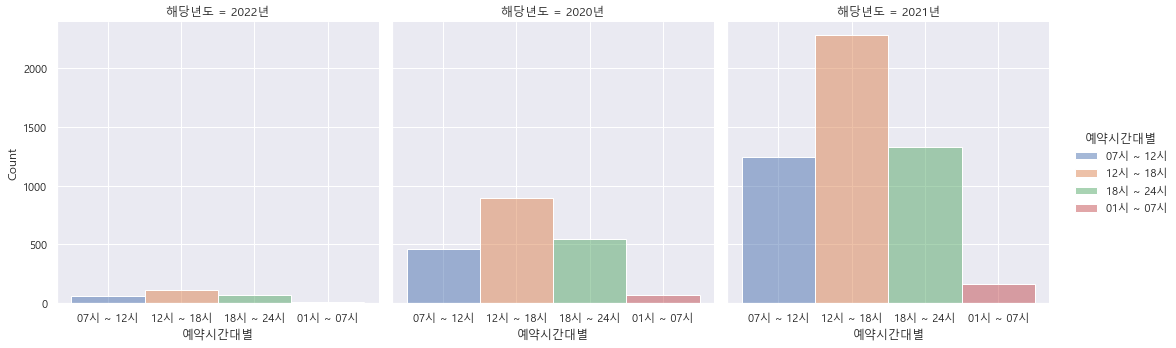

In [22]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_cancel, x="예약시간대별",col='해당년도',hue='예약시간대별',)

In [24]:
df_call

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,통화일자,통화시간,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,해당년도,call시간대
0,엘리시안CC,서부권,회원제+대중제,36,20220301,20524,1,40.0,비도민,95,NaN,NaN,NaN,2022년,~ 09시
1,스프링데일CC,동부권,대중제,18,20220301,40341,2,40.0,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
2,크라운CC,동부권,대중제,27,20220301,62252,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
3,크라운CC,동부권,대중제,27,20220301,62414,0,NaN,도민,NaN,NaN,NaN,NaN,2022년,~ 09시
4,중문GC,중문/서귀포,대중제,18,20220301,62500,2,30.0,도민,20,1년미만,5회이상,골프초년생,2022년,~ 09시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,제주CC,제주시권,대중제,18,20210615,103439,1,40.0,도민,40,NaN,NaN,NaN,2021년,09시 ~ 12시
19622,더클래식CC,동부권,대중제,18,20210615,104114,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19623,더클래식CC,동부권,대중제,18,20210615,104132,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시
19624,더클래식CC,동부권,대중제,18,20210615,104224,2,NaN,도민,NaN,1~3년,2회,골프초년생,2021년,09시 ~ 12시


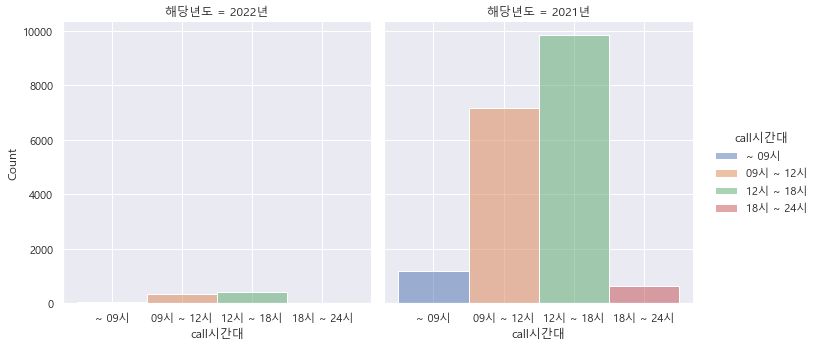

In [26]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df_call, x="call시간대",col='해당년도',hue='call시간대')

In [28]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]